# Multiclass Cross Entropy Loss
This notebook aims to help get a better understanding of the multiclass cross entropy loss by computing the likelihood function amd the negative log likelihood function with the Categorical Distribution as the chosen parametric distribution, whose outputs are passed through a softmax function

**<ins>Note</ins>**: Review loss_functions.ipynb before to understand the likelihood and the negative log likelihood functions/equation format

## Definition of Multiclass Cross Entropy Loss 
Multiclass cross entropy loss functions are used as loss functions in neural network models that assigns an input value to one of multiple output values. An example of a neural network model that would use a multiclass cross entropy loss function is a neural network model that predicts which number was handrawn. 

The multiclass cross entropy loss function for each data point is defined as:
$$
L = - \sum_{c=1}^{C} y_c \, \log(p_c)
$$
where:

- $C$ — number of classes (possible # of output values to assign the input value to) 
- $y_c$ — true label (1 for the correct class, 0 otherwise)  
- $p_c$ — predicted probability for class $c$ (from softmax)


### Imports 
Import the libraries needed to define, compute and plot the likelihood, negative log likelihood, and softmax function along with the categorial distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define the Rectified Linear Unit (ReLU) Function

In [2]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

### Define a Shallow Neural Network

In [3]:
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Ensure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x,(1,n_data))

    # Compute the hidden unit using matrix multiplication for the input array
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))

    # Compute the output of the shallow neural network using matrix multiplcation for the input array
    model_out = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return model_out

### Define Parameter Function 
Define a function to automatically define values to each parameter

In [4]:
def get_parameters():
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((3,1));  # three output biases
  omega_1 = np.zeros((3,3)); # nine output weights

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 2.0; beta_1[1,0] = -2; beta_1[2,0] = 0.0
  omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0
  omega_1[1,0] = -2.0; omega_1[1,1] = 8.0; omega_1[1,2] = -30.0
  omega_1[2,0] = 16.0; omega_1[2,1] = -8.0; omega_1[2,2] =-8

  return beta_0, omega_0, beta_1, omega_1

### Define Plotting Function

In [5]:
def plot_multiclass_classification(x_model, out_model, lambda_model, x_data = None, y_data = None, title= None):
  # Format the model data to 1D arrays
  n_data = len(x_model)
  n_class = 3
  x_model = np.squeeze(x_model)
  out_model = np.reshape(out_model, (n_class,n_data))
  lambda_model = np.reshape(lambda_model, (n_class,n_data))

  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(7.0, 3.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_model,out_model[0,:],'r-')
  ax[0].plot(x_model,out_model[1,:],'g-')
  ax[0].plot(x_model,out_model[2,:],'b-')
  ax[0].set_xlabel('Input, x'); ax[0].set_ylabel('Model outputs')
  ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
  if title is not None:
    ax[0].set_title(title)
  ax[1].plot(x_model,lambda_model[0,:],'r-')
  ax[1].plot(x_model,lambda_model[1,:],'g-')
  ax[1].plot(x_model,lambda_model[2,:],'b-')
  ax[1].set_xlabel('Input, x'); ax[1].set_ylabel('lambda or Pr(y=k|x)')
  ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.1,1.05])
  if title is not None:
    ax[1].set_title(title)
  if x_data is not None:
    for i in range(len(x_data)):
      if y_data[i] ==0:
        ax[1].plot(x_data[i],-0.05, 'r.')
      if y_data[i] ==1:
        ax[1].plot(x_data[i],-0.05, 'g.')
      if y_data[i] ==2:
        ax[1].plot(x_data[i],-0.05, 'b.')
  plt.show()

## Definition of a Softmax Function
A softmax function is a function that converts raw output values in each class into a probability for each class, ranging from 0 to 1. A softmax function is often used with a categorical distribution, which returns outputs of each input value to all the defined classes but not necessarily in the correct range.

The softmax function for each data point is defined as:
$$
p_c = \frac{e^{z_c}}{\sum_{j=1}^{C} e^{z_j}}
$$
where:

- $z_c$ — the input score (logit) for class $c$  
- $C$ — total number of classes  
- $p_c$ — predicted probability that the input belongs to class $c$

### Define a Softmax Function

In [6]:
def softmax(model_out):
  # Compute the exponential of the model outputs
  exp_model_out = np.exp(model_out)

  # Compute the sum of the exponentials 
  sum_exp_model_out = np.sum(exp_model_out, axis = 0, keepdims=True)

  # Normalize the exponentials 
  softmax_model_out = exp_model_out/sum_exp_model_out

  return softmax_model_out

### Define Training Data
Define input/output pairs of 1D training data

In [7]:
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([2,0,1,2,1,0,\
                    0,2,2,0,2,0,\
                    2,0,1,2,1,2, \
                    1,0])

### Define Parameters

In [8]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()

### Define Input Values
Define an input value (x_model) as an array of numbers from 0 to 1 with increments of 0.01 between each value

In [9]:
x_model = np.arange(0,1,0.01)

### Compute the Shallow Neural Network

In [10]:
model_out= shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)

### Pass the output through the softmax function 
Use the output of the shallow neural network as input for the softmax function and store the resulting output in lambda_model

In [11]:
lambda_model = softmax(model_out)

### Plot the shallow neural network
Plot the shallow neural network before it was passed through the softmax function (left) and after it was passed through the softmax function (right)

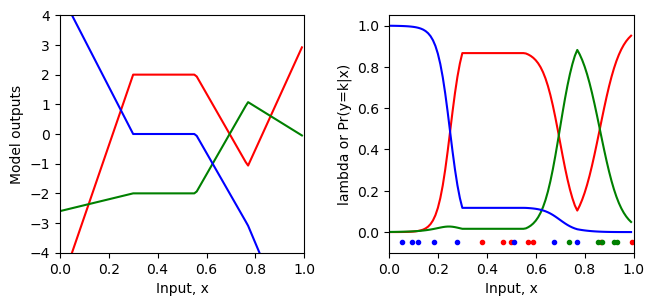

In [12]:
plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train)

## Definition of a Categorical Distribution  
A categorical distribution is a type of parametric probability distributions which describes an input value as a probability of an output value for each different possible output values. 

### Define a Cateogiral Distribution
Define a parametric probability distribution that returns the probability of each output value given an input value

In [13]:
def categorical_distribution(y, lambda_param):
    return np.array([lambda_param[row, i] for i, row in enumerate (y)])

## Likelihood Function
$$
\prod_{i=1}^{n} Pr(y_i \mid f(x; \phi)
$$

### Define a Likelihood Function (Categorical Distribution)
Define a likelihood function for the Categorical Distribution

In [14]:
def compute_likelihood(y_train, lambda_param):
  likelihood = np.prod(categorical_distribution(y_train, lambda_param))

  return likelihood

### Define Parameters

In [15]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()

### Compute the shallow neural network
Compute the shallow neural network, outputting the probabilities of all the possible output values for every single input value

In [16]:
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

### Pass the output through the softmax function 

In [17]:
lambda_train = softmax(model_out)

### Compute the likelihood function
Compute the likelihood function by using the output of the softmax function

In [18]:
likelihood = compute_likelihood(y_train, lambda_train)

## Negative Log Likelihood Function
$$
\Big( - \sum_{i=1}^{n} \log Pr(y_i \mid f(x_i; \theta) \Big)
$$

### Define a Negative Log Likelihood Function (Categorical Distribution)
Define a negative log likelihood function for the Categorical Distribution

In [19]:
def compute_negative_log_likelihood(y_train, lambda_param):
  nll = -np.sum(np.log(categorical_distribution(y_train, lambda_param)))

  return nll

### Define Parameters

In [20]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()

### Compute the shallow neural network
Compute the shallow neural network, outputting the probabilities of all the possible output values for every single input value

In [21]:
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)

### Pass the output through the softmax function

In [22]:
lambda_train = softmax(model_out)

### Compute the negative log likelihood function 
Compute the negative log likelihood function by using the output of the softmax function

In [23]:
nll = compute_negative_log_likelihood(y_train, lambda_train)

## Minimize the Loss Function (beta_1)
Using the defined likelihood and negative log likelihood function, optimize beta_1 to minimize the loss function

### Define Parameters
Define beta_1 as an array of input values from -2 to 6 with increments of 0.1 between each value. Define all the other parameters to be constants

In [24]:
beta_1_vals = np.arange(-2,6.0,0.1)
beta_0, omega_0, beta_1, omega_1 = get_parameters()

### Define Array Structure 
Define an array structure of 0s for the likelihood and negative log likelihood function

In [25]:
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)

### Compute the functions and plot the shallow neural network 
Compute the likelihood and negative log likelihood function for each beta_1 value in the defined array. Plot the shallow neural network for every 20th beta_1 value

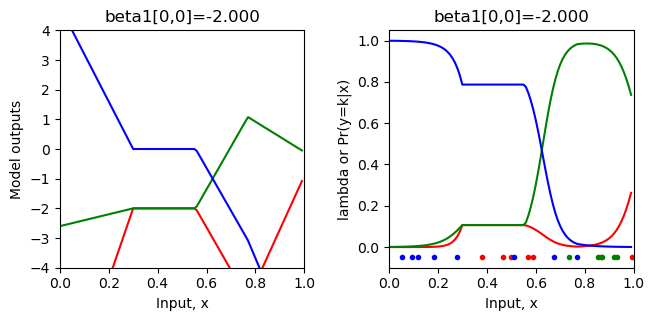

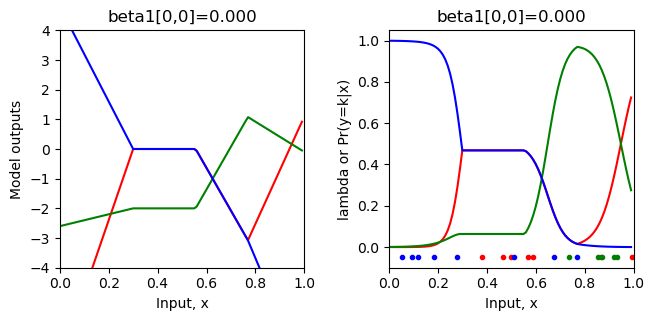

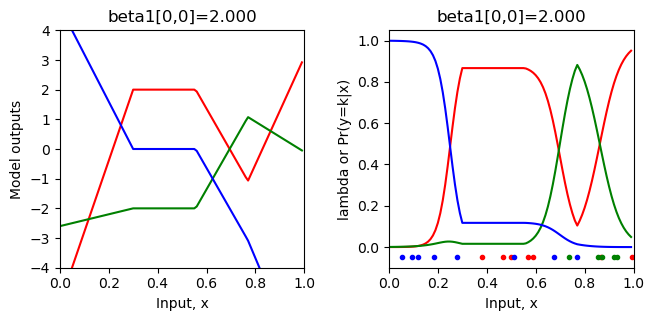

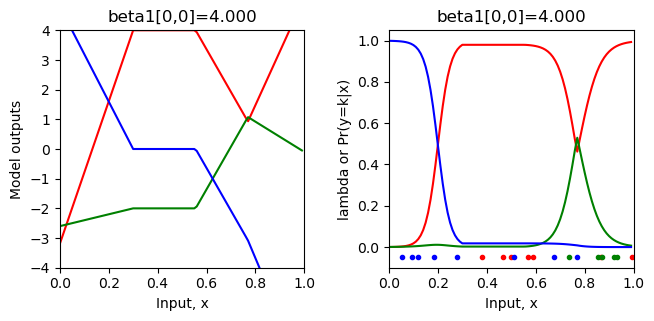

In [26]:
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]

  # Compute the network with new parameters
  model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  lambda_train = softmax(model_out)

  # Compute and store the likelihood and the negative log likelihood
  likelihoods[count] = compute_likelihood(y_train,lambda_train)
  nlls[count] = compute_negative_log_likelihood(y_train, lambda_train)

  # Plot the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    lambda_model = softmax(model_out)
    plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta1[0,0]=%3.3f"%(beta_1[0,0]))

### Plot the likelihood and negative log likelihood 
Plot the output of the likelihood and the negative log likelihood function for each beta_1 value

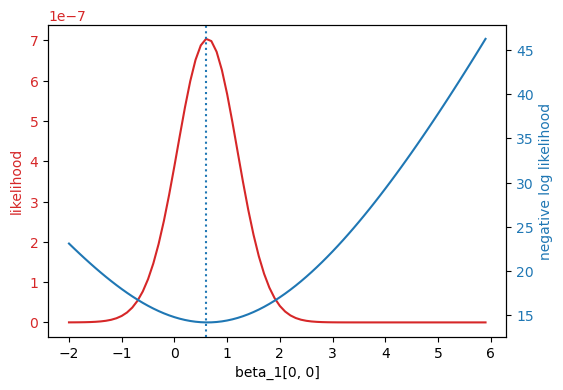

In [27]:
fig, ax = plt.subplots()
fig.tight_layout(pad=5.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax.set_xlabel('beta_1[0, 0]')
ax.set_ylabel('likelihood', color = likelihood_color)
ax.plot(beta_1_vals, likelihoods, color = likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)

ax1 = ax.twinx()
ax1.plot(beta_1_vals, nlls, color = nll_color)
ax1.set_ylabel('negative log likelihood', color = nll_color)
ax1.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

plt.show()

### Print function values for the best beta_1 value 
Using the beta_1 value that minimized the loss function the most, print the value of the maximum likelihood and the minimum negative log likelihood for that beta_1 value

In [28]:
print("Maximum likelihood = %f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))

Maximum likelihood = 0.000001, at beta_1=0.600
Minimum negative log likelihood = 14.166574, at beta_1=0.600


### Plot the best model 
Plot the model with the beta_1 value that resulted in the smallest negative log likelihood function output.

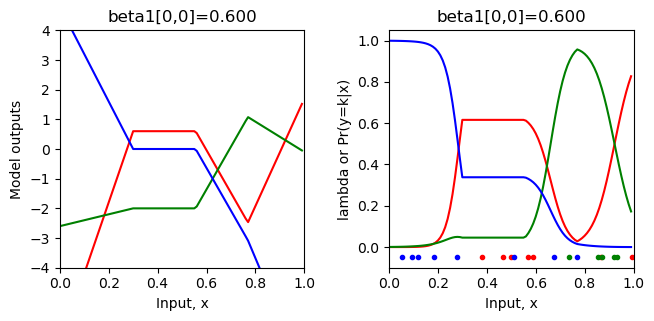

In [29]:
beta_1[0,0] = beta_1_vals[np.argmin(nlls)]
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = softmax(model_out)
plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta1[0,0]=%3.3f"%(beta_1[0,0]))